In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [8]:
y_train_full[0]

9

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [26]:
# model=keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))


#Another Method to add layers

model = keras.models.Sequential([
keras.layers.Flatten(name="hidden1",input_shape=[28, 28]),
keras.layers.Dense(300,name="dense1", activation="relu"),
keras.layers.Dense(100,name="dense2", activation="relu"),
keras.layers.Dense(10,name="dense3", activation="softmax")
])

In [27]:
model.summary()
# 784x300 + 300(bias terms)= 235500
# 300x100 + 100(bias terms)= 30100
# 100x10 + 10(bias terms) = 1010

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 300)               235500    
                                                                 
 dense2 (Dense)              (None, 100)               30100     
                                                                 
 dense3 (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
weights, biases = hidden1.get_weights()

NameError: ignored

In [29]:
for layer in model.layers:
    print(layer.name)
    print(layer.get_weights())


hidden1
[]
dense1
[array([[-0.05764199,  0.02457335, -0.05669117, ..., -0.04280653,
        -0.02398245, -0.06758019],
       [-0.07277217, -0.03313112,  0.0468775 , ..., -0.05457622,
        -0.00152831,  0.05736426],
       [ 0.01463036,  0.04657283, -0.05865727, ..., -0.01626918,
        -0.01680585,  0.00619056],
       ...,
       [ 0.04160006,  0.05439553,  0.023042  , ..., -0.03901955,
        -0.0279352 , -0.00378226],
       [ 0.03980683, -0.07159867,  0.05485605, ..., -0.01076604,
         0.04567167,  0.04329321],
       [ 0.04095566, -0.07188396, -0.02276802, ...,  0.05313157,
        -0.014185  ,  0.06769387]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [30]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6955 - accuracy: 0.7722 - val_loss: 0.5031 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4779 - accuracy: 0.8331 - val_loss: 0.4421 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4346 - accuracy: 0.8482 - val_loss: 0.4219 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4096 - accuracy: 0.8554 - val_loss: 0.3988 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3915 - accuracy: 0.8624 - val_loss: 0.3772 - val_accuracy: 0.8730
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3759 - accuracy: 0.8676 - val_loss: 0.3709 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3628 - accuracy: 0.8716 - val_loss: 0.3651 - val_accuracy:

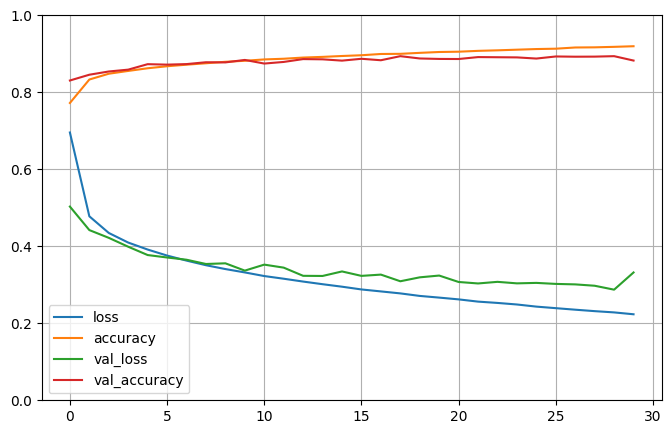

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 61.2408 - accuracy: 0.8593


[61.24083709716797, 0.8593000173568726]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 249ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred_classes = np.argmax(y_proba, axis=1)

print(y_pred_classes)

1/1 [==============================] - 0s 23ms/step
[9 2 1]
